In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

http://archive.ics.uci.edu/dataset/159/magic+gamma+telescope
Dataset Link

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [6]:
df["class"] = (df["class"] == "g").astype(int)
df.columns

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist', 'class'],
      dtype='object')

In [10]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


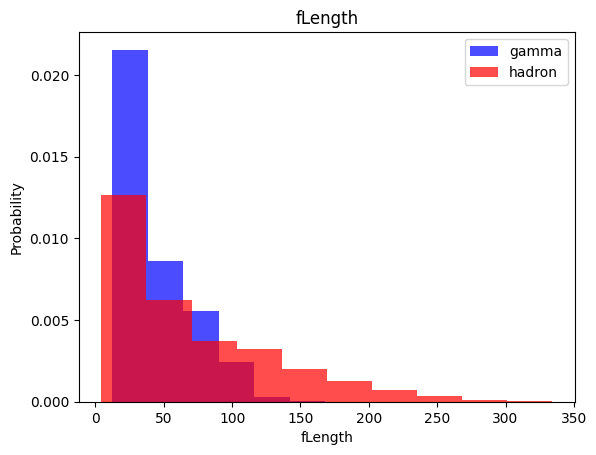

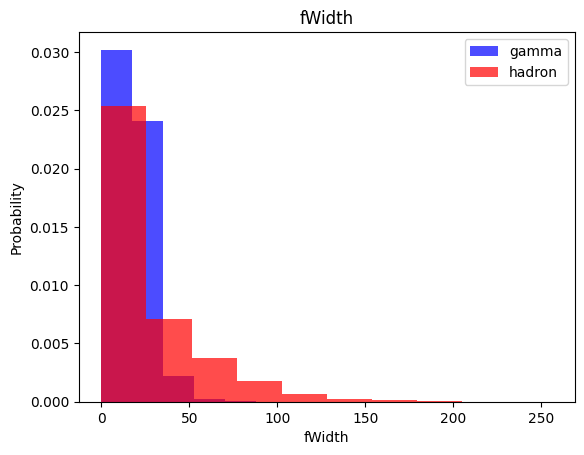

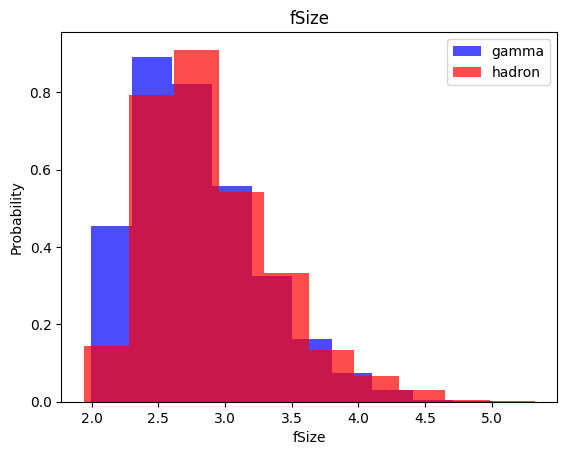

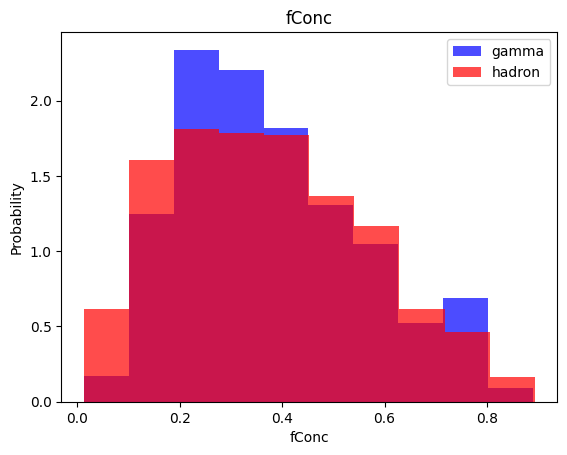

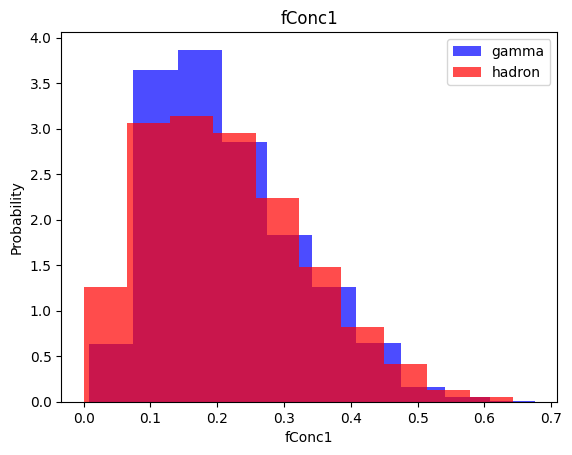

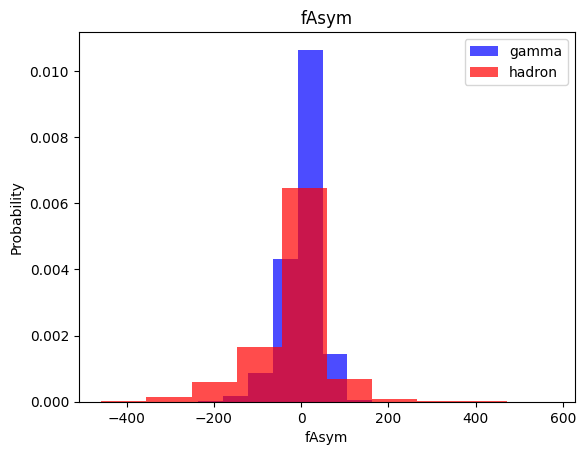

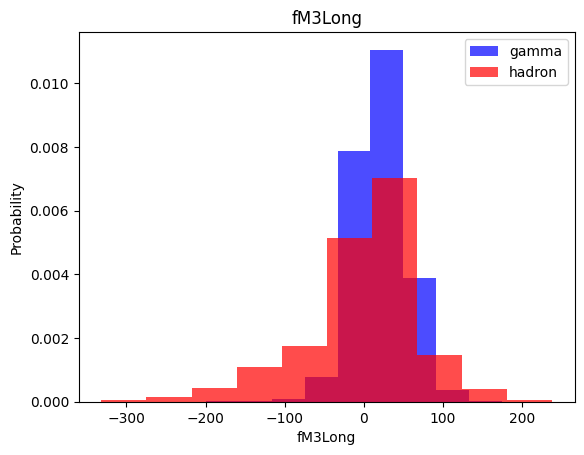

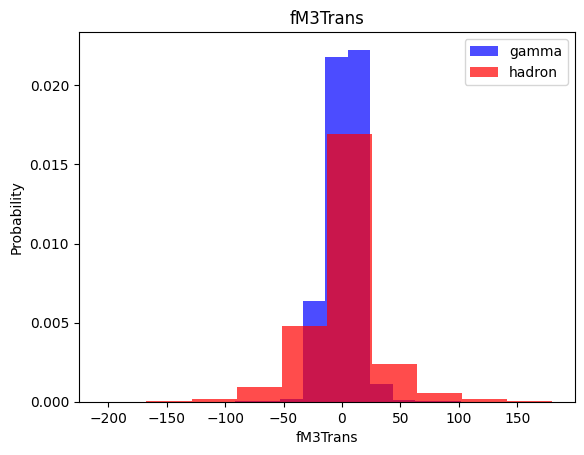

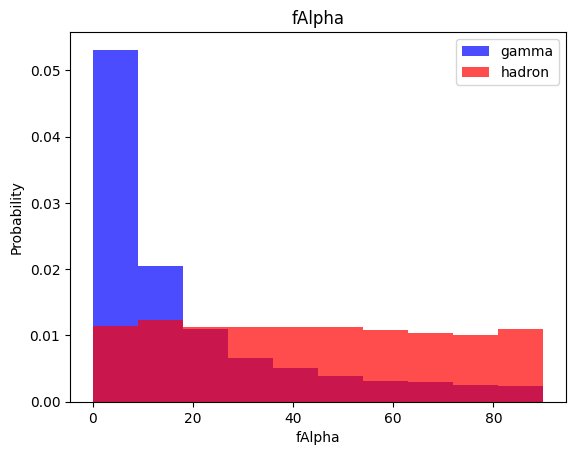

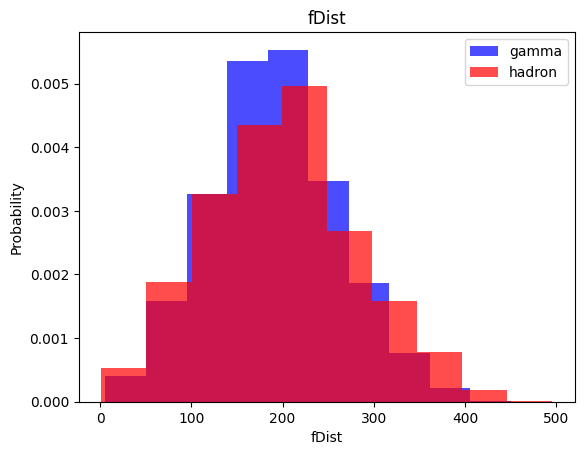

In [11]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, test datasets

In [12]:
selected_features=['fWidth','fAsym','fM3Long','fAlpha']


In [13]:
X=df[selected_features]
Y=df['class']

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



(15216, 4)
(3804, 4)
(15216,)
(3804,)


# kNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , accuracy_score

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model=knn_model.fit(X_train, Y_train)

In [11]:
Y_pred = knn_model.predict(X_test)

In [12]:
print(classification_report(Y_test, Y_pred))
knn_accuracy=accuracy_score(Y_test, Y_pred)

              precision    recall  f1-score   support

           0       0.80      0.64      0.71      1338
           1       0.82      0.91      0.87      2466

    accuracy                           0.82      3804
   macro avg       0.81      0.78      0.79      3804
weighted avg       0.82      0.82      0.81      3804



# Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, Y_train)

In [15]:
Y_pred = nb_model.predict(X_test)
print(classification_report(Y_test, Y_pred))
nb_accuracy=accuracy_score(Y_test, Y_pred)

              precision    recall  f1-score   support

           0       0.77      0.45      0.57      1338
           1       0.76      0.93      0.83      2466

    accuracy                           0.76      3804
   macro avg       0.76      0.69      0.70      3804
weighted avg       0.76      0.76      0.74      3804



# Log Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, Y_train)

In [19]:
Y_pred = lg_model.predict(X_test)
print(classification_report(Y_test, Y_pred))
lg_accuracy=accuracy_score(Y_test, Y_pred)

              precision    recall  f1-score   support

           0       0.74      0.54      0.62      1338
           1       0.78      0.90      0.83      2466

    accuracy                           0.77      3804
   macro avg       0.76      0.72      0.73      3804
weighted avg       0.77      0.77      0.76      3804



# SVM

In [17]:
from sklearn.svm import SVC

In [18]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, Y_train)

In [19]:
Y_pred = svm_model.predict(X_test)
print(classification_report(Y_test, Y_pred))
svc_accuracy=accuracy_score(Y_test, Y_pred)

              precision    recall  f1-score   support

           0       0.84      0.57      0.68      1338
           1       0.80      0.94      0.86      2466

    accuracy                           0.81      3804
   macro avg       0.82      0.75      0.77      3804
weighted avg       0.81      0.81      0.80      3804



# Neural Net

In [20]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

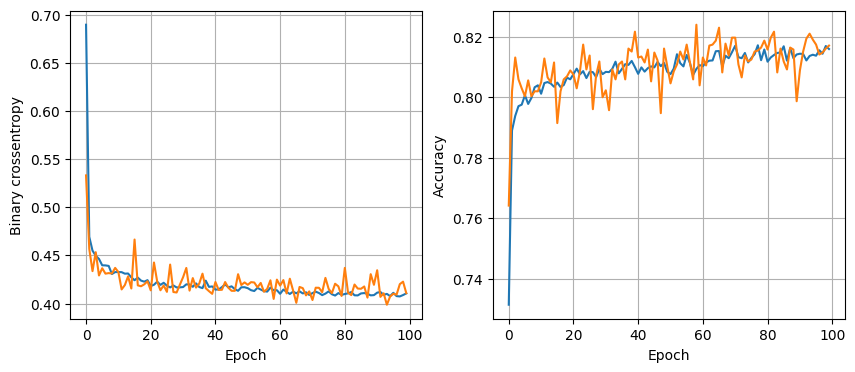

In [ ]:
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(32, activation='relu', input_shape=(None,4)),

      tf.keras.layers.Dense(32, activation='relu'),

      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(.007), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train,Y_train, epochs=100, validation_split=0.2, verbose=0
  )
plot_history(history)

In [ ]:
Y_pred = nn_model.predict(X_test)
Y_pred_classes = np.round(Y_pred)
print(classification_report(Y_test, Y_pred_classes))
nn_accuracy=accuracy_score(Y_test,Y_pred_classes)

119/119 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.83      0.62      0.71      1338
           1       0.82      0.93      0.87      2466

    accuracy                           0.82      3804
   macro avg       0.82      0.78      0.79      3804
weighted avg       0.82      0.82      0.82      3804



Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree=dtree.fit(X_train,Y_train)
Y_pred=dtree.predict(X_test)
print(classification_report(Y_test,Y_pred))
dtree_accuracy=accuracy_score(Y_test,Y_pred)

              precision    recall  f1-score   support

           0       0.67      0.69      0.68      1338
           1       0.83      0.82      0.82      2466

    accuracy                           0.77      3804
   macro avg       0.75      0.75      0.75      3804
weighted avg       0.77      0.77      0.77      3804



RandomForest

In [23]:
from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier(n_estimators=100,random_state=42)
randomforest=randomforest.fit(X_train,Y_train)
Y_pred=randomforest.predict(X_test)
print(classification_report(Y_test,Y_pred))
rand_accuracy=accuracy_score(Y_test,Y_pred)

              precision    recall  f1-score   support

           0       0.81      0.70      0.75      1338
           1       0.85      0.91      0.88      2466

    accuracy                           0.84      3804
   macro avg       0.83      0.81      0.82      3804
weighted avg       0.84      0.84      0.83      3804

